In [2]:
import numpy as np
import matplotlib.pyplot as plt
import graspy
from graspy.simulations import sbm
from graspy.embed import AdjacencySpectralEmbed as ASE
from graspy.embed import MultipleASE as MASE
from graspy.plot import pairplot
from scipy.linalg import svdvals
embedder = MASE()
%matplotlib inline

Text(0, 0.5, &#39;dimension chosen&#39;)

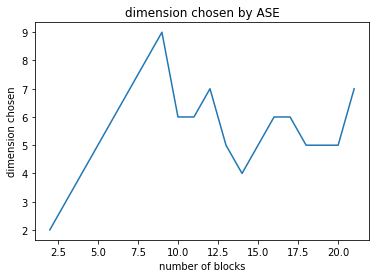

In [55]:
#relationship between number of blocks and dimension chosen
d_chosen = []

for i in range(20):

    n_blocks = 2 + i
    n_vertices = 100


    n = [n_vertices] * n_blocks

    value_diagonal = 0.8
    value_off_diagonal = 0.3

    B = value_diagonal * np.identity(n_blocks) + (value_off_diagonal*(np.ones((n_blocks,n_blocks))-np.identity(n_blocks)))
    G = sbm(n, B)
    embedder  = ASE()
    X = embedder.fit_transform(G)
    sing_val = embedder.singular_values_
    D= svdvals(B)
    sing = svdvals(G)
    d_chosen.append(X.shape[1])

blocks = range(2,22)
plt.figure()
plt.plot(blocks, d_chosen)
plt.title("dimension chosen by ASE")
plt.xlabel("number of blocks")
plt.ylabel("dimension chosen")

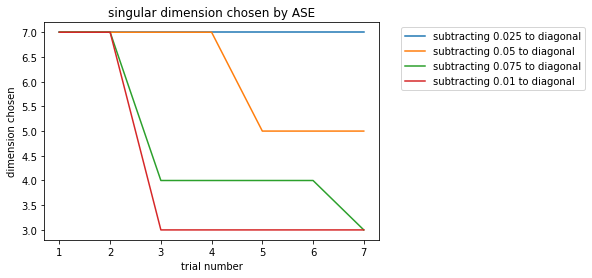

In [49]:
#now what happens if I vary only the diagonal
n_blocks = 7
n_vertices = 100


n = [n_vertices] * n_blocks

for k in range(4):

    value_diagonal = 0.8
    value_off_diagonal = 0.3

    B = value_diagonal * np.identity(n_blocks) + (value_off_diagonal*(np.ones((n_blocks,n_blocks))-np.identity(n_blocks)))

    d_chosen = []

    for i in range(n_blocks):
        for j in range(i+1,n_blocks):
            B[j,j] = B[j,j] - 0.025*(k+1)
        G = sbm(n, B)
        embedder  = ASE()
        X = embedder.fit_transform(G)
        d_chosen.append(X.shape[1])
    

    n_trial = range(1, n_blocks+1)
    plt.plot(n_trial, d_chosen)
    plt.title("dimension chosen by ASE")
    plt.xlabel("trial number")
    plt.ylabel("dimension chosen")
    plt.legend(["subtracting 0.025 to diagonal", "subtracting 0.05 to diagonal", "subtracting 0.075 to diagonal", "subtracting 0.01 to diagonal"], bbox_to_anchor=(1.05, 1))

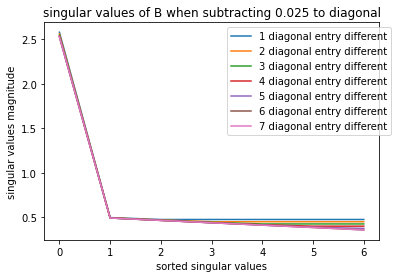

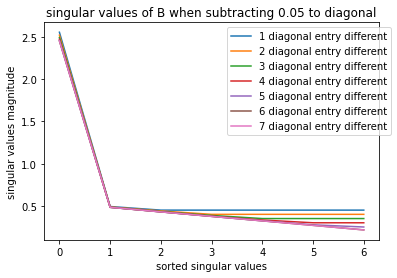

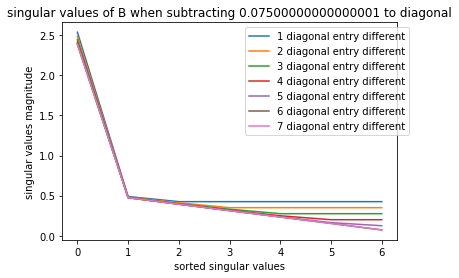

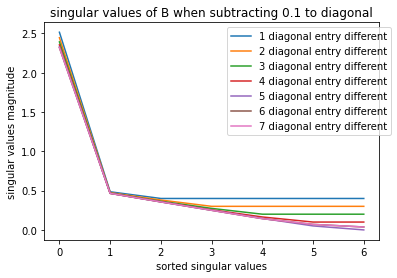

In [52]:
#Now varying off diagonal
#now what happens if I vary only the diagonal
n_blocks = 7
n_vertices = 100


n = [n_vertices] * n_blocks

for k in range(4):

    value_diagonal = 0.8
    value_off_diagonal = 0.3

    B = value_diagonal * np.identity(n_blocks) + (value_off_diagonal*(np.ones((n_blocks,n_blocks))-np.identity(n_blocks)))

    d_chosen = []

    for i in range(n_blocks):
        for j in range(i+1,n_blocks):
            B[j,j] = B[j,j] - 0.025*(k+1)
        G = sbm(n, B)
        embedder  = ASE()
        X = embedder.fit_transform(G)
        d_chosen.append(X.shape[1])
        sing_val_B = svdvals(B)
        if(i == 0):
            plt.figure()
        plt.plot(sing_val_B)
        plt.title("singular values of B when subtracting " + str(0.025*(k+1)) + " to diagonal")
        plt.xlabel("sorted singular values")
        plt.ylabel("singular values magnitude")
        plt.legend(["1 diagonal entry different", "2 diagonal entry different",  "3 diagonal entry different", "4 diagonal entry different",  "5 diagonal entry different","6 diagonal entry different",  "7 diagonal entry different"], bbox_to_anchor=(1.05, 1))
    

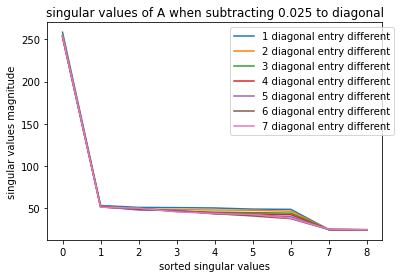

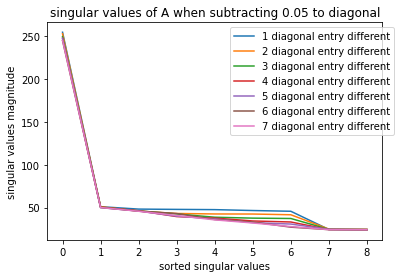

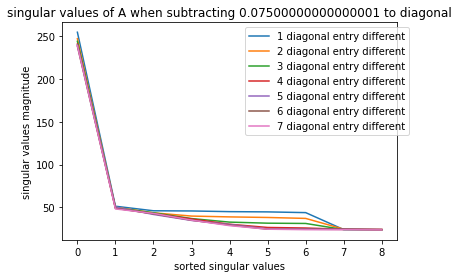

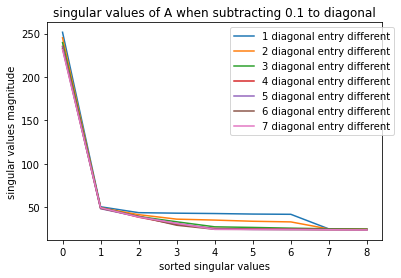

In [66]:
n_blocks = 7
n_vertices = 100


n = [n_vertices] * n_blocks

for k in range(4):

    value_diagonal = 0.8
    value_off_diagonal = 0.3

    B = value_diagonal * np.identity(n_blocks) + (value_off_diagonal*(np.ones((n_blocks,n_blocks))-np.identity(n_blocks)))

    d_chosen = []

    for i in range(n_blocks):
        for j in range(i+1,n_blocks):
            B[j,j] = B[j,j] - 0.025*(k+1)
        G = sbm(n, B)
        embedder  = ASE()
        X = embedder.fit_transform(G)
        d_chosen.append(X.shape[1])
        sing_val_A = svdvals(G)
        if(i == 0):
            plt.figure()
        plt.plot(sing_val_A[:9])
        plt.title("singular values of A when subtracting " + str(0.025*(k+1)) + " to diagonal")
        plt.xlabel("sorted singular values")
        plt.ylabel("singular values magnitude")
        plt.legend(["1 diagonal entry different", "2 diagonal entry different",  "3 diagonal entry different", "4 diagonal entry different",  "5 diagonal entry different","6 diagonal entry different",  "7 diagonal entry different"], bbox_to_anchor=(1.05, 1))

Text(0, 0.5, &#39;dimension chosen&#39;)

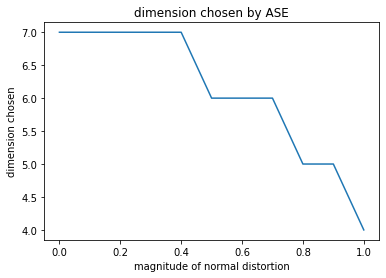

In [75]:
#varying off diagonal by adding normal distribution noise
n_blocks = 7
n_vertices = 100


n = [n_vertices] * n_blocks

value_diagonal = 0.8
value_off_diagonal = 0.3 #value before perturbation
variance_off_diagonal = 0.1

d_chosen = []

for i in range(11):

    magnitude_noise = 0.1*(i)

    perturbation_Bij = np.ones((n_blocks,n_blocks))-np.identity(n_blocks)
    for idx, x in np.ndenumerate(perturbation_Bij):
        if(idx[0] != idx[1]):
            if(idx[0] < idx[1]):
                perturbation_Bij[idx] = value_off_diagonal + np.random.normal(loc=0, scale=variance_off_diagonal)*magnitude_noise
            else:
                perturbation_Bij[idx] = perturbation_Bij[idx[1],idx[0]]

    B = value_diagonal * np.identity(n_blocks) + perturbation_Bij
    G = sbm(n, B)
    embedder  = ASE()
    X = embedder.fit_transform(G)
    d_chosen.append(X.shape[1])

mag_noise = np.array(range(0, 11))*0.1
plt.plot(mag_noise, d_chosen)
plt.title("dimension chosen by ASE")
plt.xlabel("magnitude of normal distortion")
plt.ylabel("dimension chosen")

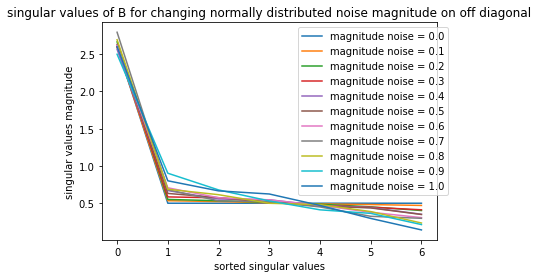

In [72]:
#varying off diagonal by adding normal distribution noise
n_blocks = 7
n_vertices = 100


n = [n_vertices] * n_blocks

value_diagonal = 0.8
value_off_diagonal = 0.3 #value before perturbation
variance_off_diagonal = 0.1

d_chosen = []

for i in range(11):

    magnitude_noise = 0.1*(i)

    perturbation_Bij = np.ones((n_blocks,n_blocks))-np.identity(n_blocks)
    for idx, x in np.ndenumerate(perturbation_Bij):
        if(idx[0] != idx[1]):
            if(idx[0] < idx[1]):
                perturbation_Bij[idx] = value_off_diagonal + np.random.normal(loc=0, scale=variance_off_diagonal)*magnitude_noise
            else:
                perturbation_Bij[idx] = perturbation_Bij[idx[1],idx[0]]

    B = value_diagonal * np.identity(n_blocks) + perturbation_Bij
    G = sbm(n, B)
    embedder  = ASE()
    X = embedder.fit_transform(G)
    d_chosen.append(X.shape[1])
    sing_val_B = svdvals(B)
    plt.plot(sing_val_B)
    plt.title("singular values of B for changing normally distributed noise magnitude on off diagonal")
    plt.xlabel("sorted singular values")
    plt.ylabel("singular values magnitude")
    plt.legend(["magnitude noise = 0.0","magnitude noise = 0.1", "magnitude noise = 0.2",  "magnitude noise = 0.3", "magnitude noise = 0.4",  "magnitude noise = 0.5","magnitude noise = 0.6",  "magnitude noise = 0.7", "magnitude noise = 0.8", "magnitude noise = 0.9", "magnitude noise = 1.0"], bbox_to_anchor=(1.05, 1))


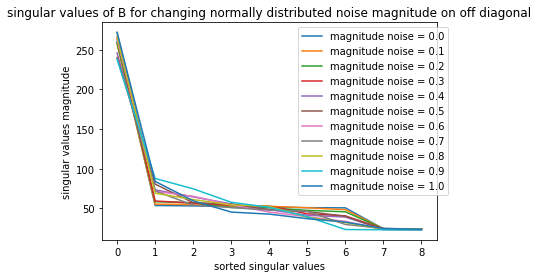

In [71]:
n_blocks = 7
n_vertices = 100


n = [n_vertices] * n_blocks

value_diagonal = 0.8
value_off_diagonal = 0.3 #value before perturbation
variance_off_diagonal = 0.1

d_chosen = []

for i in range(11):

    magnitude_noise = 0.1*(i)

    perturbation_Bij = np.ones((n_blocks,n_blocks))-np.identity(n_blocks)
    for idx, x in np.ndenumerate(perturbation_Bij):
        if(idx[0] != idx[1]):
            if(idx[0] < idx[1]):
                perturbation_Bij[idx] = value_off_diagonal + np.random.normal(loc=0, scale=variance_off_diagonal)*magnitude_noise
            else:
                perturbation_Bij[idx] = perturbation_Bij[idx[1],idx[0]]

    B = value_diagonal * np.identity(n_blocks) + perturbation_Bij
    G = sbm(n, B)
    embedder  = ASE()
    X = embedder.fit_transform(G)
    d_chosen.append(X.shape[1])
    sing_val_A = svdvals(G)
    plt.plot(sing_val_A[:9])
    plt.title("singular values of B for changing normally distributed noise magnitude on off diagonal")
    plt.xlabel("sorted singular values")
    plt.ylabel("singular values magnitude")
    plt.legend(["magnitude noise = 0.0","magnitude noise = 0.1", "magnitude noise = 0.2",  "magnitude noise = 0.3", "magnitude noise = 0.4",  "magnitude noise = 0.5","magnitude noise = 0.6",  "magnitude noise = 0.7", "magnitude noise = 0.8", "magnitude noise = 0.9", "magnitude noise = 1.0"], bbox_to_anchor=(1.05, 1))
